# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
dataset_path = "../dataset_raw/winequality.csv"
df = pd.read_csv(dataset_path)

print("=== 5 Baris Pertama Dataset ===")
print(df.head())

print("\n=== Informasi Dataset ===")
print(df.info())

print("\n=== Statistik Deskriptif ===")
print(df.describe())

=== 5 Baris Pertama Dataset ===
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Tema default
sns.set(style="whitegrid")

# Plot default
plt.rcParams["figure.figsize"] = (8, 5)

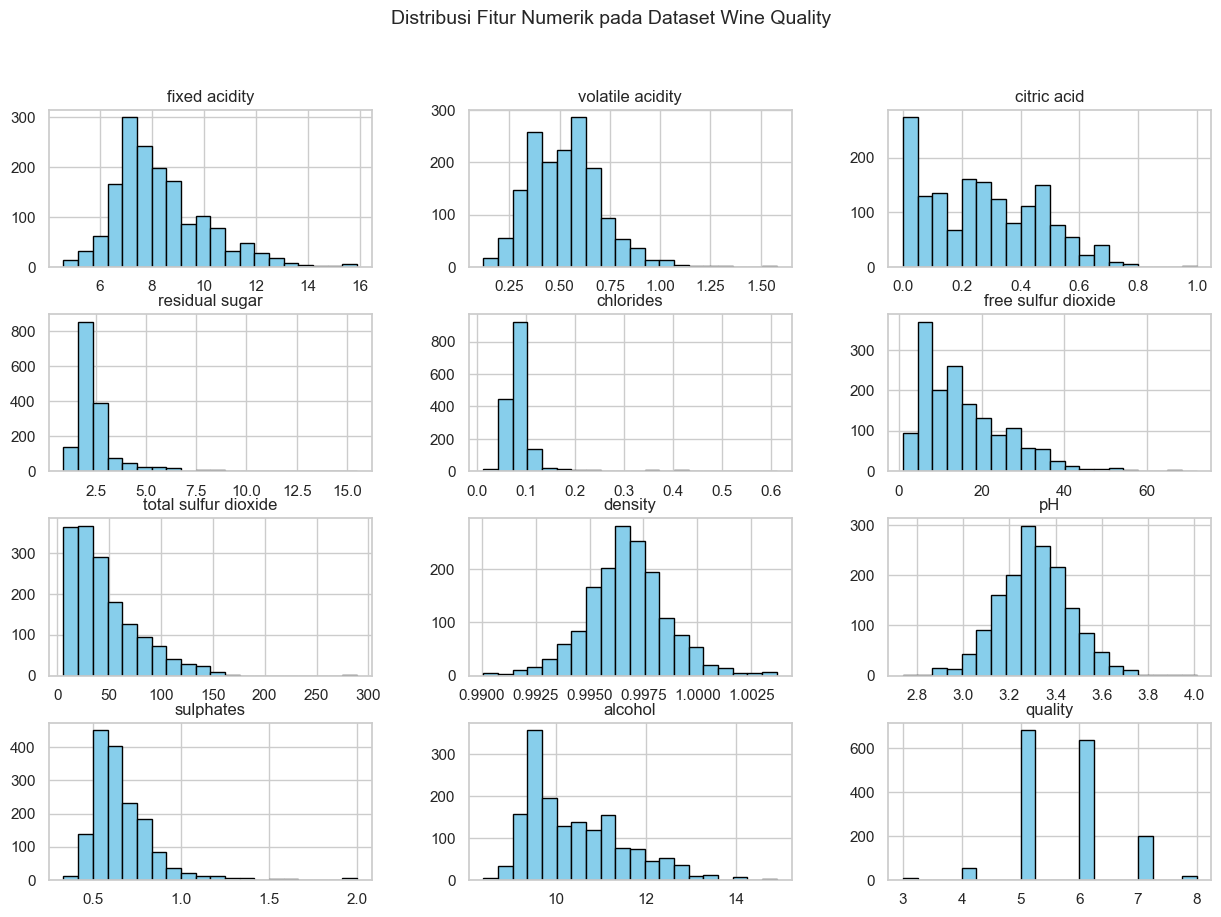

In [4]:
# Histogram
df.hist(bins=20, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Fitur Numerik pada Dataset Wine Quality", fontsize=14)
plt.show()

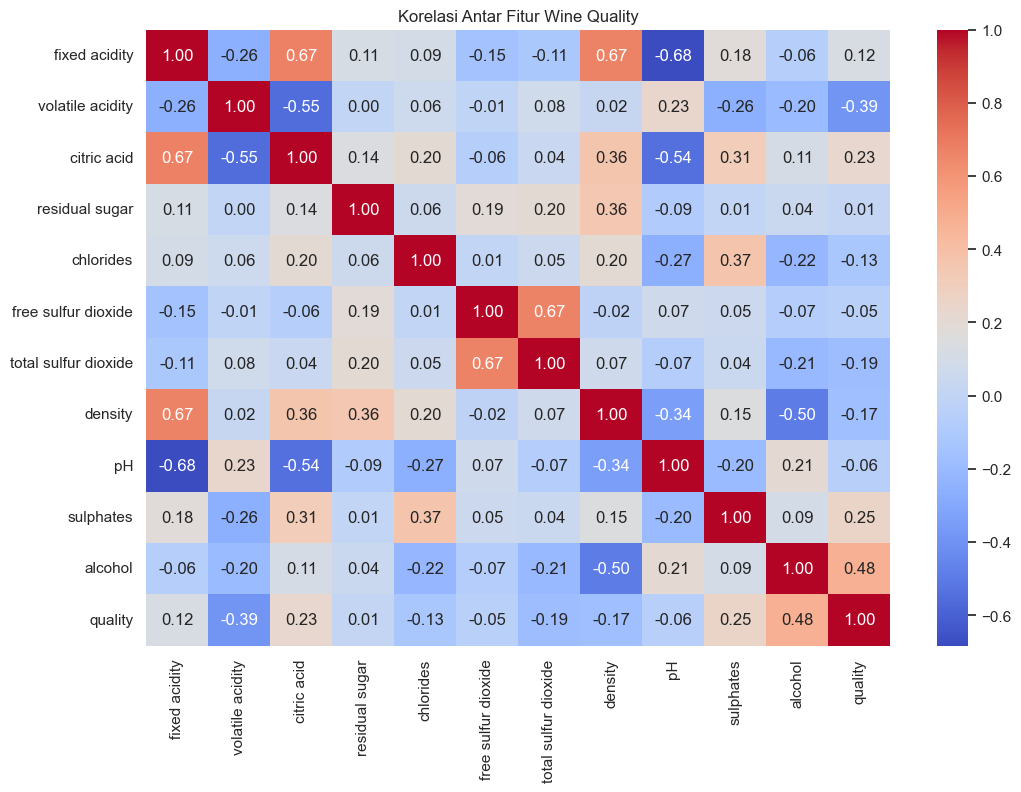

In [5]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Wine Quality")
plt.show()

C:\Users\loqme\AppData\Local\Temp\ipykernel_16708\3926815062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=df, palette="viridis")


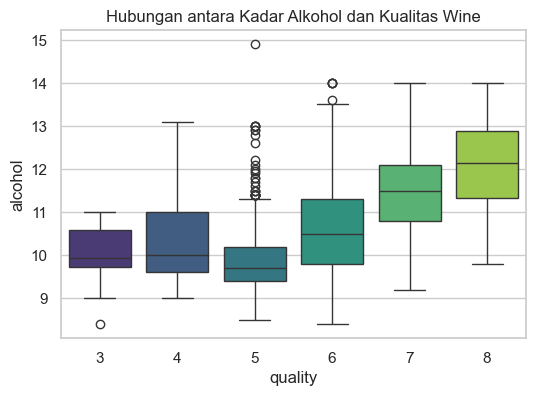

In [6]:
# Alcohol vs Quality
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="alcohol", data=df, palette="viridis")
plt.title("Hubungan antara Kadar Alkohol dan Kualitas Wine")
plt.show()

C:\Users\loqme\AppData\Local\Temp\ipykernel_16708\3197874527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="volatile acidity", data=df, palette="magma")


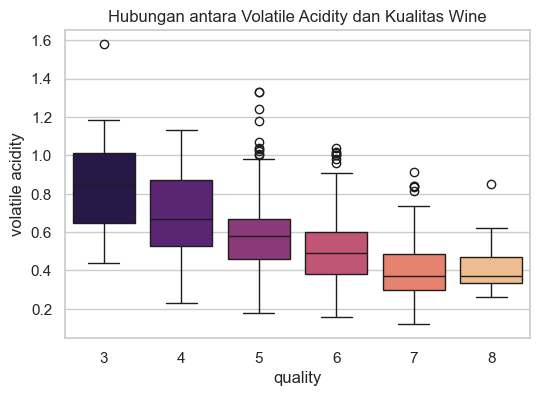

In [7]:

# Volatile acidity vs Quality
plt.figure(figsize=(6,4))
sns.boxplot(x="quality", y="volatile acidity", data=df, palette="magma")
plt.title("Hubungan antara Volatile Acidity dan Kualitas Wine")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Load dataset
dataset_path = "../dataset_raw/winequality.csv"
df = pd.read_csv(dataset_path)

# Missing values 
print("Jumlah Missing Values per Kolom:\n", df.isnull().sum())

# Duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

# Pisahkan fitur dan target 
X = df.drop("quality", axis=1)
y = df["quality"]

# Normalisasi (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat DataFrame hasil scaling 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Gabungkan kembali dengan target 
df_preprocessing = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Simpan folder preprocessing 
output_dir = "../preprocessing/dataset_preprocessing"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "winequality_preprocessing.csv")
df_preprocessing.to_csv(output_path, index=False)

print(f"\n Preprocessing selesai! File disimpan di: {output_path}")


Jumlah Missing Values per Kolom:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Jumlah Data Duplikat: 240

 Preprocessing selesai! File disimpan di: ../preprocessing/dataset_preprocessing\winequality_preprocessing.csv


In [11]:
from automate_Imelda import automate_preprocessing

automate_preprocessing("../dataset_raw/winequality.csv")

Dataset berhasil dibaca!

Cek data...
Missing values per kolom:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Jumlah data duplikat: 240

Normalisasi fitur...

✅ Preprocessing otomatis selesai! File disimpan di ../dataset_preprocessing\winequality_preprocessing.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374,5
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575,5
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575,5
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575,6
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,-0.869983,0.494756,-0.983977,-0.461157,-0.407702,1.159265,-0.264277,-0.106490,0.711149,0.945435,-0.861924,6
1355,-1.215536,0.385444,-0.983977,-0.387183,0.038015,1.542281,-0.084619,-0.968269,0.904724,-0.461331,0.062574,5
1356,-1.388312,0.112167,-0.881656,-0.239233,-0.529261,2.212559,0.124983,-0.850510,1.356397,0.593744,0.709723,6
1357,-1.388312,0.631395,-0.779336,-0.387183,-0.265883,1.542281,-0.084619,-0.663167,1.679021,0.300667,-0.214775,5
